In [167]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [168]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [169]:
data.head()
data.shape


(42000, 785)

In [170]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data) # shuffling the data before test and train data splitting
data_test =  data[0:1000].T
y_test = data_test[0] # takes the label row from data_test
x_test = data_test[1:n]
x_test = x_test/255

data_train =  data[1000:m].T
y_train = data_train[0] # takes the label row from data_test
x_train = data_train[1:n]
x_train = x_train/255
_,m_train = x_train.shape

In [171]:
y_train



array([2, 0, 1, ..., 2, 5, 3])

In [172]:
def init_params():
    w1 = np.random.rand(10,784)-0.5 # to give output between -.5 to .5
    b1 = np.random.rand(10,1)-0.5
    w2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1)-0.5
    return w1,b1,w2,b2
def Relu(z):
    return np.maximum(z,0)
def softmax(z):
    a = np.exp(z)/sum(np.exp(z))
    return a
def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x)+b1
    a1= Relu(z1)
    z2 = w2.dot(a1)+b2
    a2 = softmax(z2)
    return z1,a1,z2,a2
def Relu_deriv(z):
    return z>0
def one_hot(y):
    one_hot_y = np.zeros((y.size,y.max()+1)) #(m,9+1)
    one_hot_y[np.arange(y.size),y] =1 # set the (0,y),(1,y)......(m-1,y) element to 1
    one_hot_y = one_hot_y.T # now each column is a example
    return one_hot_y
def backward_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1/m*dz2.dot(a1.T)
    db2 = 1/m*np.sum(dz2)
    dz1 = w2.T.dot(dz2)*Relu_deriv(z1)
    dw1 = 1/m*dz1.dot(x.T)
    db1 = 1/m*np.sum(dz1)
    return dw1,db1,dw2,db2
def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2

In [173]:
def get_prediction(yp):# yp is basically a2 predicted
   return np.argmax(yp,axis= 0) #yp represents the softmax output of the final layer, meaning it contains the probability scores for each class.

# np.argmax(A2, 0) finds the index of the highest probability along axis 0 (columns), which corresponds to the predicted class.
def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions== y)/y.size # finding accuracy by true 1 and false 0
def gradient_descent(x,y,alpha,iterations):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2 = backward_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%100 == 0:
            print('Iterations:',i)
            predictions = get_prediction(a2)
            print(get_accuracy(predictions,y))
    return w1,b1,w2,b2

In [174]:
w1,b1,w2,b2 = gradient_descent(x_train,y_train,0.1,1200)

Iterations: 0
[7 4 8 ... 5 5 5] [2 0 1 ... 2 5 3]
0.07460975609756097
Iterations: 100
[1 1 1 ... 5 2 3] [2 0 1 ... 2 5 3]
0.6178048780487805
Iterations: 200
[4 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.7508048780487805
Iterations: 300
[4 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.7997317073170732
Iterations: 400
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8234146341463414
Iterations: 500
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8388048780487805
Iterations: 600
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8500487804878049
Iterations: 700
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8590487804878049
Iterations: 800
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8651707317073171
Iterations: 900
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8706341463414634
Iterations: 1000
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8759512195121951
Iterations: 1100
[2 0 1 ... 2 6 3] [2 0 1 ... 2 5 3]
0.8797073170731707


🔧 interpolation='nearest'
This controls how the image is scaled when it’s resized for display (e.g., zoomed in on screen).

'nearest' means:

No smoothing or blending of pixels.

Each pixel is displayed as a sharp square block, preserving its original value.

Ideal for displaying pixel-perfect images like digits or binary images.

Compare with:
'bilinear': smooths the image.

'bicubic': even smoother, often used for photos.

In [175]:
# 88 percent accuary
def make_predictions(x,w1,b1,w2,b2):
    _,_,_,a2 = forward_prop(w1,b1,w2,b2,x)
    predictions = get_prediction(a2)
    return predictions
def test_prediction(index,w1,b1,w2,b2):
    current_image = x_train[:,index,None]
    current_image = x_train[:,index,None]
    prediction= make_predictions(x_train[:,index,None],w1,b1,w2,b2)
    label= y_train[index]
    print('prediction:',prediction)
    print('label:',label)
    current_image = current_image.reshape((28,28))*255
    plt.gray() 
    plt.imshow(current_image,interpolation='nearest')
    plt.show()
# .gray is used in Matplotlib to set the colormap to grayscale. This is particularly useful when displaying images (e.g., in image processing or deep learning tasks) where you want to view the image in shades of gray instead of color.

prediction: [2]
label: 2


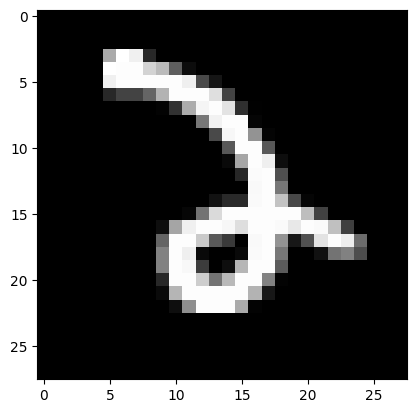

prediction: [4]
label: 4


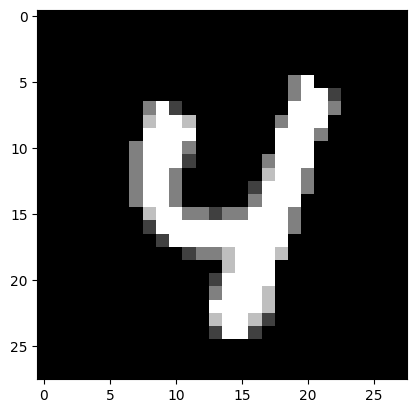

prediction: [2]
label: 2


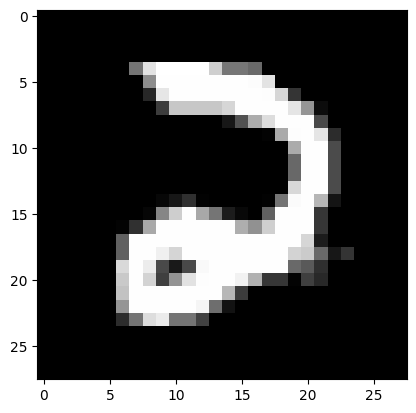

prediction: [3]
label: 3


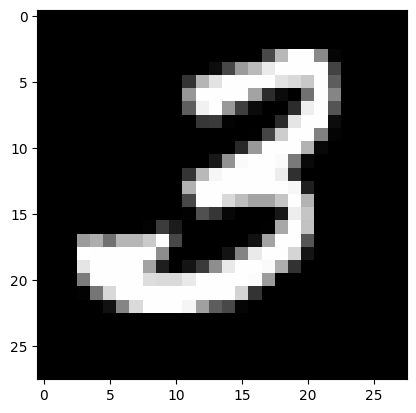

In [176]:
test_prediction(0,w1,b1,w2,b2)
test_prediction(4,w1,b1,w2,b2)
test_prediction(10,w1,b1,w2,b2)
test_prediction(101,w1,b1,w2,b2)